# Satpute, Kanchan Bharat -- Homework 3

We study Table 13.2 on p 240 of Lange and Chapter 13 question 11 (on page 240) and Chapter 14, Example 14.10.1 on p246.

The table contains counts of the number of days a given number of deaths occurred. 

In [19]:
import numpy as np
freq = np.array([162,267,271,185,111,61,27,8,3,1])

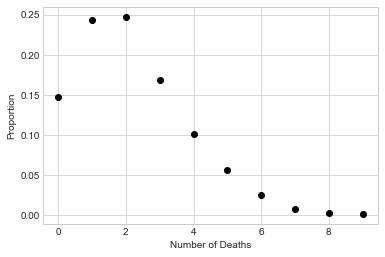

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

## proportion of different number of deaths
plt.plot(np.arange(freq.size), freq/np.sum(freq), 'o', color='black')
plt.xlabel("Number of Deaths")
plt.ylabel("Proportion");

## Problem 1

Confirm Lange's claim in question 11 that "A Poisson distribution gives a poor fit to these data . . ." by computing the MLE of the Poisson parameter $\lambda$ (this can be done by hand using calculus) and plotting the resulting probability mass function over the observed data. They should be a bit discrepant (thus justifying the claim).

In [21]:
import math as mt

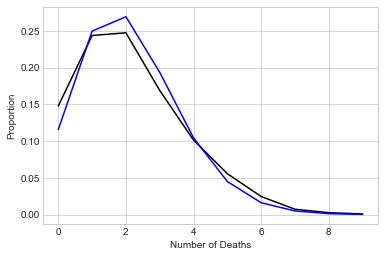

In [22]:
lamda = np.sum(freq*np.arange(freq.size)) / np.sum(freq)
pmf = []
for i in range(freq.size):
    pmf.append(np.exp(-lamda) * (lamda**i) / mt.factorial(i))

plt.plot(np.arange(freq.size), freq/np.sum(freq), color='black')
plt.plot(np.arange(freq.size), pmf, color='blue')
plt.xlabel("Number of Deaths")
plt.ylabel("Proportion");

## Problem 2

Fit the $\alpha$, $\mu_1$ and $\mu_2$ parameters for the mixture of two Poissons model proposed in Question 11. You must write your own fitting code (cannot use `scipy optimize` or R `optim`). You can write any sort of optimizer you like such as gradient ascent, Newton's method (or any of its varients), or an EM approach. Discuss how you select starting parameters and monitor convergence. You can confirm your results by also using Python or R built in optimizers.

In [23]:
def func(par) :
    K = (par[0]*np.exp(-par[1])*(par[1]**i) + (1-par[0])*np.exp(-par[2])*(par[2]**i)) / mt.factorial(i);
    return(K);

In [24]:
def loglik(par) :
    LL = 0
    for i in range (freq.size) :
         LL += np.log(func(par))*freq[i]
    return(LL);

In [25]:
def deriv_a(par) :
    d_a = 0
    for i in range (freq.size) :
        d_a += ((freq[i]*(np.exp(-par[1])*(par[1]**i) - np.exp(-par[2])*(par[2]**i))) / (func(par)*mt.factorial(i)))
    return(d_a);

In [26]:
def deriv_mu1(par):
    d_mu1 = 0
    for i in range (freq.size) :
        d_mu1 += ((freq[i]*par[0]*(np.exp(-par[1])*i*(par[1]**(i-1)) - (par[1]**i)*np.exp(-par[1]))) / (func(par)*mt.factorial(i)))
    return(d_mu1);

In [27]:
def deriv_mu2(par):
    d_mu2 = 0
    for i in range (freq.size) :
        d_mu2 += ((freq[i]*(1-par[0])*(np.exp(-par[2])*i*(par[2]**(i-1)) - (par[2]**i)*np.exp(-par[2]))) / (func(par)*mt.factorial(i)))
    return(d_mu2);

In [34]:
N = 100
initial_param = np.array([0.3, 1.2, 1])
param = np.zeros((N+1, 3))
param[0,:] = initial_param

### This code chunk below is the one we had submitted earlier. 

Final parameters: alpha =  0.345720313181   mu1 =  1.33687643127   mu2 =  1.47104824335


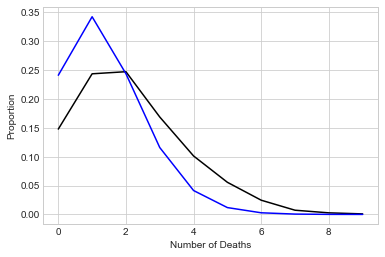

In [35]:
gamma = 1
gradfunc = np.zeros((N+1, 3))
for i in range (N) :
    gradfunc[i,:] = [deriv_a(param[i,:]), deriv_mu1(param[i,:]), deriv_mu2(param[i,:])]
    half = True
    while(half) :
            temp = np.add(param[i,:], gamma*gradfunc[i,:])
            newlik = loglik(temp)
            if(newlik < loglik(param[i,:])) :
                gamma = gamma / 2
            else: half = False 
    param[i+1,:] = temp
    
print("Final parameters: alpha = ",param[-1,0], "  mu1 = ",param[-1,1],   "  mu2 = ", param[-1,2] )
para = param[-1, :]

pmfnew = []
for i in range(freq.size):
    pmfnew.append(((para[0]*np.exp(-para[1])*(para[1]**i) + (1-para[0])*np.exp(-para[2])*(para[2]**i)) / mt.factorial(i)))

plt.plot(np.arange(freq.size), freq/np.sum(freq), color='black')
plt.plot(np.arange(freq.size), pmfnew, color='blue')
plt.xlabel("Number of Deaths")
plt.ylabel("Proportion");

### This code chunk below is the modified one.

In [36]:
gradfunc = np.zeros((N+1, 3))
for i in range (N) :
    gamma = 1
    gradfunc[i,:] = [deriv_a(param[i,:]), deriv_mu1(param[i,:]), deriv_mu2(param[i,:])]
    half = True
    while(half) :
            temp = np.add(param[i,:], gamma*gradfunc[i,:])
            newlik = loglik(temp)
            if(newlik < loglik(param[i,:]) or np.isnan(newlik)) :
                gamma = gamma / 2
            else: half = False 
    param[i+1,:] = temp     

C:\Users\Kanchan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
C:\Users\Kanchan\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


KeyboardInterrupt: 

In [37]:
i

3

#### This code chunk keeps on running and when i force stop the code execution, it was found that the code went in a infinite loop at (i = 3).